<a href="https://colab.research.google.com/github/KathaSnehitha/Infosys-Internship/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

In [3]:
#Step 1: Create Synthetic Dataset
# ------------------------------
np.random.seed(42)
n_samples = 2000

data = pd.DataFrame({
    "src_ip": np.random.choice(["192.168.1." + str(i) for i in range(1,50)], n_samples),
    "dst_ip": np.random.choice(["10.0.0." + str(i) for i in range(1,50)], n_samples),
    "protocol": np.random.choice(["TCP", "UDP", "ICMP"], n_samples),
    "bytes_in": np.random.randint(50, 5000, n_samples),
    "bytes_out": np.random.randint(50, 5000, n_samples),
    "duration": np.random.randint(1, 1000, n_samples),
    "failed_logins": np.random.randint(0, 5, n_samples),
    "attack_type": np.random.choice(["benign","DDoS","BruteForce","Malware","Phishing"], n_samples, p=[0.6,0.15,0.1,0.1,0.05])
})

print("Sample dataset:\n", data.head())

Sample dataset:
          src_ip     dst_ip protocol  bytes_in  bytes_out  duration  \
0  192.168.1.39  10.0.0.25     ICMP      1603       2873       825   
1  192.168.1.29  10.0.0.45      TCP      4628       4774       785   
2  192.168.1.15  10.0.0.19      TCP      1062       3320       244   
3  192.168.1.43  10.0.0.46      UDP       236        535       327   
4   192.168.1.8  10.0.0.36     ICMP      1931        249       987   

   failed_logins attack_type  
0              3  BruteForce  
1              1      benign  
2              2        DDoS  
3              0      benign  
4              1      benign  


In [5]:
# ------------------------------
# Step 2: 20 Prompts for Analysis
# ------------------------------

# Prompt 1: Class distribution
print("\n Attack Class Distribution:\n", data["attack_type"].value_counts())


 Attack Class Distribution:
 attack_type
benign        1209
DDoS           304
BruteForce     194
Malware        192
Phishing       101
Name: count, dtype: int64


In [6]:
# Prompt 2: Missing values
print("\n Missing Values:\n", data.isnull().sum())


 Missing Values:
 src_ip           0
dst_ip           0
protocol         0
bytes_in         0
bytes_out        0
duration         0
failed_logins    0
attack_type      0
dtype: int64


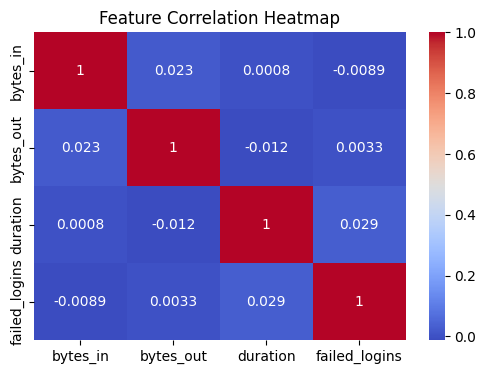

In [7]:
# Prompt 3: Correlation heatmap
numeric_cols = ["bytes_in","bytes_out","duration","failed_logins"]
plt.figure(figsize=(6,4))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Prompt 4: Summary stats per attack
print("\nSummary Stats per Attack:\n", data.groupby("attack_type")[numeric_cols].mean())


Summary Stats per Attack:
                 bytes_in    bytes_out    duration  failed_logins
attack_type                                                     
BruteForce   2677.314433  2593.747423  513.216495       2.185567
DDoS         2402.197368  2684.588816  479.628289       1.986842
Malware      2357.421875  2496.703125  491.843750       2.052083
Phishing     2570.128713  2547.326733  515.950495       2.346535
benign       2545.588089  2523.822994  518.531844       2.088503


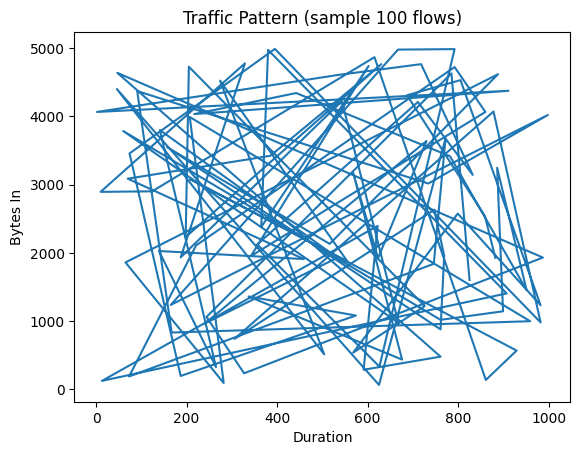

In [9]:
# Prompt 5: Time-series simulation (duration vs bytes_in)
plt.plot(data["duration"][:100], data["bytes_in"][:100])
plt.title("Traffic Pattern (sample 100 flows)")
plt.xlabel("Duration")
plt.ylabel("Bytes In")
plt.show()

In [10]:
# Encode categorical
le = LabelEncoder()
data["protocol"] = le.fit_transform(data["protocol"])
data["src_ip"] = le.fit_transform(data["src_ip"])
data["dst_ip"] = le.fit_transform(data["dst_ip"])

X = data.drop("attack_type", axis=1)
y = data["attack_type"]

In [11]:
# Prompt 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [12]:
# Prompt 7: Baseline Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nBaseline Random Forest Report:\n", classification_report(y_test, y_pred))



Baseline Random Forest Report:
               precision    recall  f1-score   support

  BruteForce       0.00      0.00      0.00        58
        DDoS       0.33      0.03      0.06        91
     Malware       0.33      0.02      0.03        58
    Phishing       0.00      0.00      0.00        30
      benign       0.60      0.98      0.75       363

    accuracy                           0.60       600
   macro avg       0.25      0.21      0.17       600
weighted avg       0.45      0.60      0.46       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


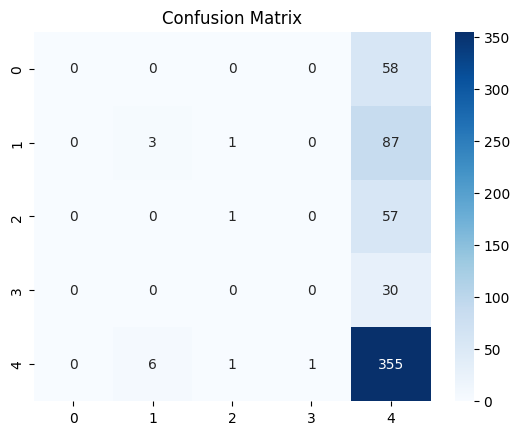

In [13]:
# Prompt 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Prompt 9: ROC-AUC (multi-class simplified)
print("\nROC-AUC Score:", roc_auc_score(pd.get_dummies(y_test), rf.predict_proba(X_test), multi_class="ovr"))


ROC-AUC Score: 0.49302446679792605


In [15]:
# Prompt 10: Feature Importance
importances = rf.feature_importances_
print("\nFeature Importances:\n", dict(zip(X.columns, importances)))



Feature Importances:
 {'src_ip': np.float64(0.15227333573669508), 'dst_ip': np.float64(0.15414426959308178), 'protocol': np.float64(0.05175551101000903), 'bytes_in': np.float64(0.1924001047385753), 'bytes_out': np.float64(0.1925041950617176), 'duration': np.float64(0.1860729028224839), 'failed_logins': np.float64(0.07084968103743733)}


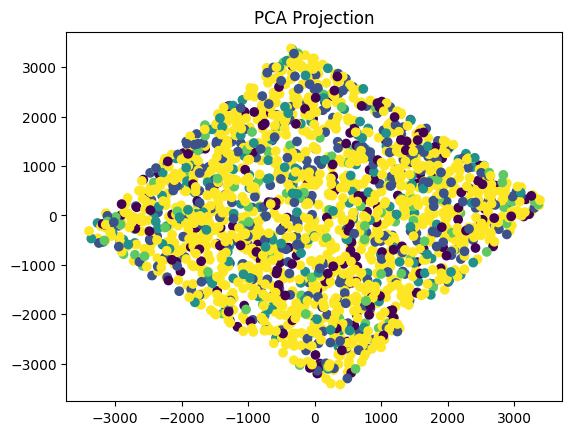

In [16]:
# Prompt 11: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=le.fit_transform(y), cmap="viridis")
plt.title("PCA Projection")
plt.show()

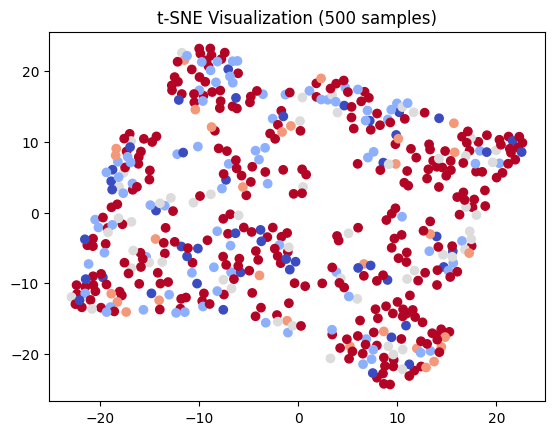

In [17]:
# Prompt 12: t-SNE for anomaly visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X[:500])
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=le.fit_transform(y[:500]), cmap="coolwarm")
plt.title("t-SNE Visualization (500 samples)")
plt.show()

In [18]:
# Prompt 13: Isolation Forest for anomalies
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
print("\nOutlier Detection Count:\n", pd.Series(outliers).value_counts())



Outlier Detection Count:
  1    1900
-1     100
Name: count, dtype: int64


In [19]:
# Prompt 14: Neural Net classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500)
mlp.fit(X_train, y_train)
print("\nNeural Net Accuracy:", mlp.score(X_test, y_test))


Neural Net Accuracy: 0.5866666666666667


In [21]:
# Prompt 15: Permutation importance
perm = permutation_importance(rf, X_test, y_test, n_repeats=10)
print("\nPermutation Importance:", perm.importances_mean)



Permutation Importance: [0.00633333 0.00283333 0.00333333 0.00333333 0.0055     0.00266667
 0.00433333]


In [22]:
# Prompt 16: Cross-dataset generalization simulation
# (here we just retrain on part of train set and test on held-out)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3)
rf.fit(X_train2, y_train2)
print("\nCross-split Validation Accuracy:", rf.score(X_val, y_val))


Cross-split Validation Accuracy: 0.5857142857142857


In [23]:
# Prompt 17: Adversarial robustness test (add noise)
X_noisy = X_test.copy()
X_noisy["bytes_in"] += np.random.normal(0, 50, X_noisy.shape[0])
print("\nRobustness Accuracy on Noisy Data:", rf.score(X_noisy, y_test))


Robustness Accuracy on Noisy Data: 0.5966666666666667


In [24]:
# Prompt 18: Class imbalance check
print("\nClass Distribution Percentage:\n", y.value_counts(normalize=True)*100)



Class Distribution Percentage:
 attack_type
benign        60.45
DDoS          15.20
BruteForce     9.70
Malware        9.60
Phishing       5.05
Name: proportion, dtype: float64


In [25]:
# Prompt 19: Top misclassified samples
misclassified = X_test[y_test != y_pred]
print("\nMisclassified Samples:\n", misclassified.head())


Misclassified Samples:
       src_ip  dst_ip  protocol  bytes_in  bytes_out  duration  failed_logins
58         5       6         0       833       1767       167              2
1597      41      31         0      4187       4988       221              0
0         32      17         0      1603       2873       825              3
1479      34      19         0      2579       4255       670              3
1082       2      16         1      3668        406       303              3


In [26]:
# Prompt 20: KPI-like summary
print("\nKPI Summary:\n- Accuracy:", rf.score(X_test, y_test), "\n- Recall:", classification_report(y_test,y_pred,output_dict=True)["weighted avg"]["recall"])


KPI Summary:
- Accuracy: 0.6016666666666667 
- Recall: 0.5983333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
